<a href="https://colab.research.google.com/github/farheenfathimaa/TensorFlow-DeepLearning/blob/main/02_neural_network_classification_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with TensorFlow
In this notebook we're going to learn how to write neural networks for classification problems.

A **classification** is where you try to classify something as one thing or another.

A few types of classification problems:
* Binary classification
* Mutliclass classification
* Multilabel classification

See full course materials on GitHub: [link](https://github.com/mrdbourke/tensorflow-deep-learning/)

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [2]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a little hard to understand right now... let's visualize it!

In [4]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [14]:
circles["label"].value_counts()

label
1    500
0    500
Name: count, dtype: int64

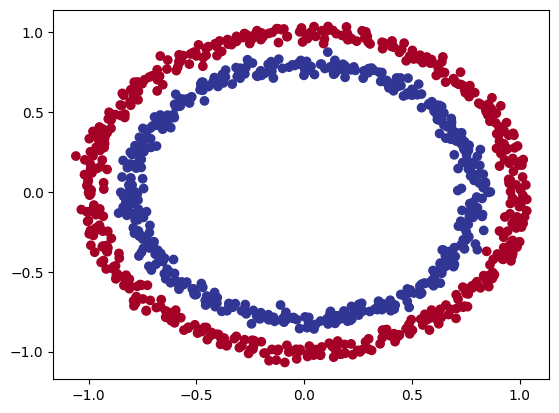

In [5]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

🛠 Exercise: Before pushing forward, spend 10-minutes playing around with [playground.tensorflow.org](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.36999&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=fals) building and running different neural networks. See what happens when you change different hyperparameters.


## Input and output shapes

In [6]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# How many samples we're working with
len(X), len(y)

(1000, 1000)

In [8]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling
The steps in modelling with TensorFlow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...
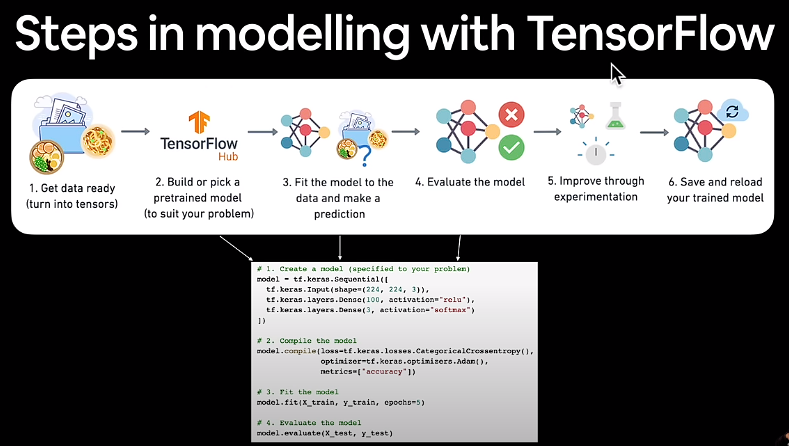

In [9]:
# Import tensorflow
import tensorflow as tf
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 4s 3ms/step - loss: 6.5354 - accuracy: 0.4900
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 6.5399 - accuracy: 0.4900
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 6.4836 - accuracy: 0.4900
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 6.2593 - accuracy: 0.4790
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 5.8090 - accuracy: 0.4670


In [10]:
# Let's try and improve our model by training it for longer
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

Since we're working on a binary classification problem and our model is getting around ~50% accuracy... it's performing as if it's guessing.

So let's step things up a notch and add an extra layer.

In [12]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [13]:
# 4. Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.7345 - accuracy: 0.4430


[0.7345238924026489, 0.4429999887943268]

## Improving our model
Let's look into our bag of tricks to see how we can improve our model.

1. **Create a model** - we might to add more layers or increase the number of hidden units within a layer.
2. **Compiling a model** - here we might to choose a different optimization function such as Adam instead of SGD.
3. **Fitting a model** - perhaps we might fit our model for more epochs (leave it training for longer).

In [15]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model(3 layers this time)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # added 100 dense neurons
    tf.keras.layers.Dense(10), # added another layer with 10 neurons
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [16]:
# 4. Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5370


[0.6931910514831543, 0.5370000004768372]

**🔑 Note:** Whenever your model is performing strangely or there's something going on with your data you're not quite sure of, remember these three words: **visualize, visualize, visualize**. Inspect your data, inspect your model, inpsect your model's predictions.

To visualize our model's predictions, let's create a function `plot_decision_boundary()`, this function will:

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [17]:
import numpy as np

In [22]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function was inspired by two resources:
   1. https://cs231n.github.io/neural-networks-case-study/
   2. https://github.com/madewithml/basics/blob/master/notebooks/09_Multilayer_Perceptrons/09_TF_Multilayer_Perceptrons.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()]  # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("Doing multiclass classification")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("Doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
Doing binary classification


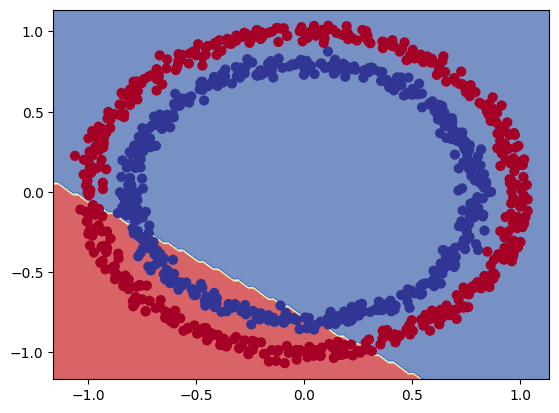

In [24]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [25]:
# Let's see if our model can be used for a regression problem...
tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

X_regression, y_regression

(<tf.Tensor: shape=(200,), dtype=int32, numpy=
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
        195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
        260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320,
        325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385,
        390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450,
        455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515,
        520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580,
        585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645,
        650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710,
        715, 720, 725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775,
        780, 785, 790, 795, 800, 805, 810, 815, 820, 825, 830, 835, 840,
    